<a href="https://colab.research.google.com/github/louispaulet/Classfication_and_Representation_Learning_course/blob/main/CLR_Project_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

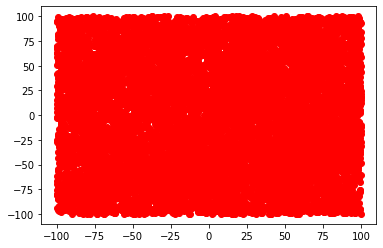

In [ ]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from google.colab import files
import random


matrix_pos = np.loadtxt(open('data.txt'),delimiter=',')

def display_cells(cell_matrix):
  #get x and y coords from matrix
  x = cell_matrix[:, 1]
  y = cell_matrix[:, 2]
  print(plt.scatter(x, y, c = 'red'))

display_cells(matrix_pos)

We are trying some QLEARNING

In [ ]:
#create hyperparams
total_episodes = 10000       # Total episodes
learning_rate = 0.7          # Learning rate
max_steps = 99               # Max steps per episode
gamma = 0.95                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.005            # Exponential decay rate for exploration prob

In [ ]:
#create qtable
# action indexes
move = 0
eat = 1
# state indexes
start = 0
nothing = 1
cell_eaten = 2
death = 3

#create empty qtable
qtable = np.zeros((4, 2))
qtable

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
#create the step action that will tell use in what state we are, what is the reward and penalty
def step(action):
  if action == 'move xy'
    penalty = 'distance pos -> xy'
    state =  'move'
  elif action == 'eat'
    reward += 'cell score'
    penalty = 'distance pos -> cell_pos(xy)'
    state = 'eat'
  return state, reward, penalty

In [ ]:
#training loop
for step in range(max_steps):
  

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

#project parameters
current_coords = [[0, 0]]
time_left = 10000
score = 0
eaten_list = []

def compute_cell_distances(cell_matrix, position):
  #compute distances between all cells and current point
  distances = euclidean_distances(cell_matrix[:, 1:3], position)

  matrix_distances = np.c_[cell_matrix, distances]

  return matrix_distances

# id, matrix_pos = find_closest_cell(matrix_pos, position)

In [ ]:
def compute_cell_scores(cell_matrix, penality = 1):
  #divide cell score value by distance to compute distance related score
  score = np.divide(cell_matrix[:, 3],cell_matrix[:, 4]**penality)
  cell_matrix = np.c_[cell_matrix, score]

  return cell_matrix

#compute_cell_scores(matrix_pos)[4]  

In [ ]:
def get_best_cell(cell_matrix):
  #get index at which the smallest distance is located
  id = np.where(cell_matrix[:, 5] == np.amax(cell_matrix[:, 5]))[0][0]
  return id

#get_best_cell(matrix_pos)

In [ ]:
def remove_used_scores(cell_matrix):

  cell_matrix = np.delete(cell_matrix, 5, 1)
  cell_matrix = np.delete(cell_matrix, 4, 1)
  return cell_matrix

In [ ]:
def eat_cell(id, time_left, score, eaten_list, cell_matrix, default_position):
  if (time_left - cell_matrix[id][4]) > 0: 
    time_left -= cell_matrix[id][4] #remove time-distance
    score += cell_matrix[id][3] #add score
    current_coords = [[cell_matrix[id][1], cell_matrix[id][2]]] #update position
    eaten_list = np.append(eaten_list, cell_matrix[id][0]) #add cell id to the kill list
    cell_matrix = np.delete(cell_matrix, (id), axis=0) #remove eaten cell
  else:
    current_coords = default_position #case where we can't eat a cell
  return time_left, score, current_coords, eaten_list, cell_matrix

# time_left, score, current_coords, eaten_list, matrix_pos = eat_cell(id, time_left, score, eaten_list, matrix_pos)

# matrix_pos[0]

In [ ]:
current_coords

[[0, 0]]

In [ ]:
time_out = 10000 # worst case scenario emergency exit
penality = 3

#game loop
while(time_left > 0 and time_out > 0 and np.shape(matrix_pos)[0] != 0):

  matrix_pos = compute_cell_distances(matrix_pos, current_coords)
  matrix_pos = compute_cell_scores(matrix_pos, penality)
  id = get_best_cell(matrix_pos)

  default_position = current_coords
  time_left, score, current_coords, eaten_list, matrix_pos = eat_cell(id, time_left, score, eaten_list, matrix_pos, default_position)
  
  matrix_pos = remove_used_scores(matrix_pos)
  
  time_out -= 1

  #display here doesn't work, prints only addresses
  # if (time_out % 5000 == 1):
  #   display_cells(matrix_pos)

time_left, score, current_coords,time_out, eaten_list

(3.3621629467840806,
 340915.0,
 [[-89.21, -58.65]],
 0,
 array([5478., 8498.,  220., ..., 6832., 8768., 7425.]))

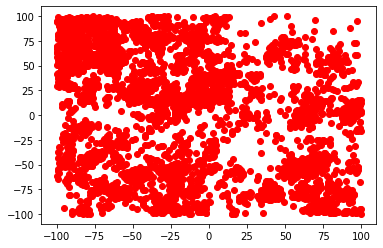

In [ ]:
#display final matrix
display_cells(matrix_pos)

In [ ]:
#export text file
eaten_list = eaten_list.astype(int)
np.savetxt(fname="output.csv", delimiter=",",fmt='%i', X=eaten_list)
# files.download('output.csv')

In [ ]:
eaten_list

array([5478, 8498,  220, ..., 6832, 8768, 7425])